In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

$\text{Exercise 1}$

Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$


In [3]:
f=lambda x:(x**3+5*x-20)/(x**2+3)
a=0
b=2
A=quad(f,a,b)[0]
print('A=',A)
g=lambda x:(x-1/3)*(x**4-3)**(1/2)
c=3
d=5
B=quad(g,c,d)[0]
print('B=',B)

A= -7.049316535735796
B= 124.40877284192784


In [4]:
f=lambda x:(x**3+5*x-20)/(x**2+3)
a=0
b=2
A=quad(f,a,b)[0]
print('A=',A)

A= -7.049316535735796


$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

In [5]:
def model(z,t):
    x1,x2,x3=z
    dx1dt=-(1/2)*x1
    dx2dt=(1/2)*x1-(1/4)*x2
    dx3dt=(1/4)*x2-(1/6)*x3
    return np.array([dx1dt,dx2dt,dx3dt])
c=[1,1,1]
a=0
b=4
N=200
t=np.linspace(a,b,N)
w=odeint(model,c,t)
x1 = w[:,0]
x2 = w[:,1]
x3 = w[:,2]

2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


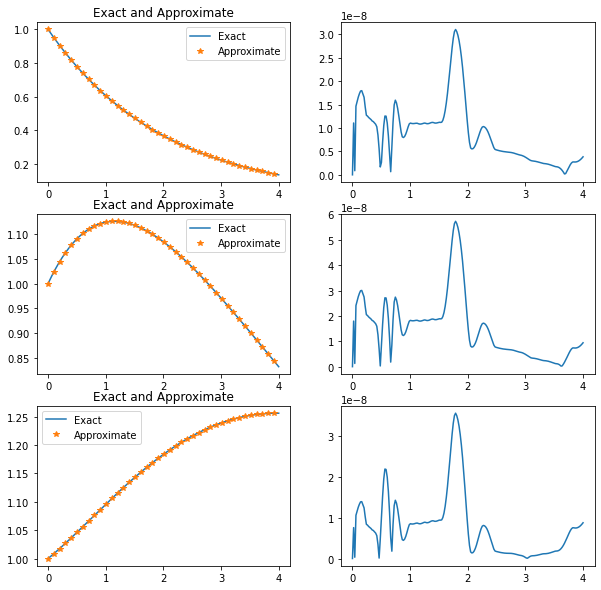

In [6]:
a=0
b=4
N=200
t=np.linspace(a,b,N)

X1 = np.exp(-t/2)
X2= -2*np.exp(-t/2)+3*np.exp(-t/4)
X3= (3/2)*np.exp(-t/2)-9*np.exp(-t/4)+(17/2)*np.exp(-t/6)
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.plot(t,X1)
plt.plot(t[::5],x1[::5],"*")
plt.title("Exact and Approximate")
plt.legend(["Exact","Approximate"])

plt.subplot(3,2,2)
plt.plot(t, abs(X1-x1))


plt.subplot(3,2,3)
plt.plot(t,X2)
plt.plot(t[::5],x2[::5],"*")
plt.title("Exact and Approximate")
plt.legend(["Exact","Approximate"])

plt.subplot(3,2,4)
plt.plot(t, abs(X2-x2))



plt.subplot(3,2,5)
plt.plot(t,X3)
plt.plot(t[::5],x3[::5],"*")
plt.title("Exact and Approximate")
plt.legend(["Exact","Approximate"])

plt.subplot(3,2,6)
plt.plot(t, abs(X3-x3))






$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [7]:
def EulerOdeSys(f,c,t):
    H = t[1] - t[0]
    N = len(t)
    M = len(c)
    z = np.zeros((N,M))
    z[0] = c
    for k in range(0,N-1):
        z[k+1] = z[k] + H*f(z[k],t[k])
    return z

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [8]:
def RK4OdeSys(f,c,t):
    H = t[1] - t[0]
    N = len(t)
    M = len(c)
    z = np.zeros((N,M))
    z[0] = c
    for k in range(0,N-1):
        k1 = f(z[k],t[k])
        k2 = f(z[k]+H*(k1/2),t[k]+H/2)
        k3 = f(z[k]+H*(k2/2),t[k]+H/2)
        k4 = f(z[k]+H*k3,t[k]+H)
        z[k+1] = z[k]+H/6*(k1+2*k2+2*k3+k4)
       
    return z

3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [9]:
# Solution using function EulerOdeSys
Z_euler = EulerOdeSys(model,c,t)
x1_euler=Z_euler[:,0]
x2_euler=Z_euler[:,1]
x3_euler=Z_euler[:,2]

# Solution using function RK4OdeSys
Z_RK4 =  RK4OdeSys(model,c,t)
x1_RK4=Z_RK4[:,0] 
x2_RK4 =Z_RK4[:,1]
x3_RK4 =Z_RK4[:,2]

4. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

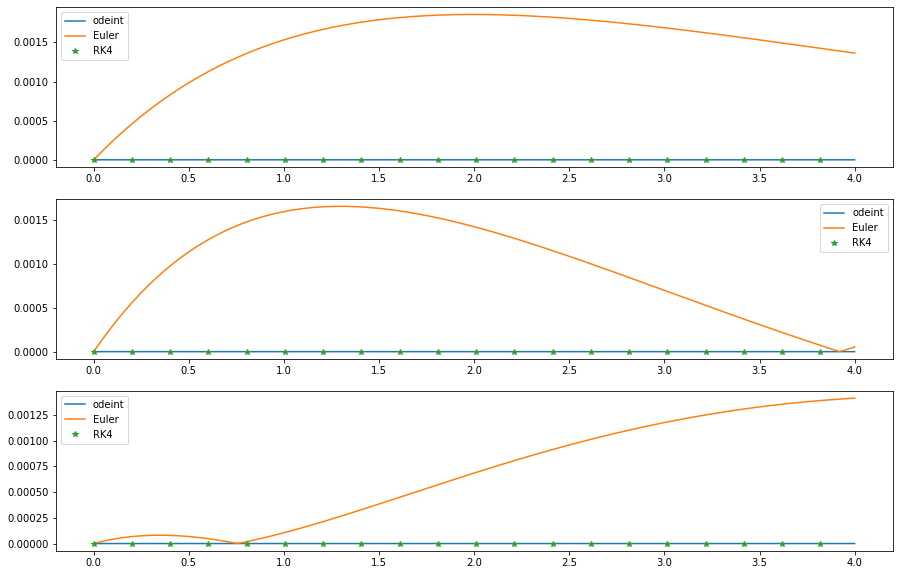

In [10]:
error_1_Euler=abs(X1-x1_euler)
error_2_Euler=abs(X2-x2_euler)
error_3_Euler=abs(X3-x3_euler)

error_1_RK4=abs(X1-x1_RK4)
error_2_RK4=abs(X2-x2_RK4)
error_3_RK4=abs(X3-x3_RK4)

error_1_ODE  = abs(X1-x1)
error_2_ODE  = abs(X2-x2)
error_3_ODE  = abs(X3-x3)

plt.figure(figsize = (15,10))
plt.subplot(3,1,1)
plt.plot(t,error_1_ODE)
plt.plot(t,error_1_Euler)
plt.plot(t[::10],error_1_RK4[::10],'*')
plt.legend(['odeint','Euler','RK4'])


plt.subplot(3,1,2)
plt.plot(t,error_2_ODE)
plt.plot(t,error_2_Euler)
plt.plot(t[::10],error_2_RK4[::10],'*')
plt.legend(['odeint','Euler','RK4'])

plt.subplot(3,1,3)
plt.plot(t,error_3_ODE)
plt.plot(t,error_3_Euler)
plt.plot(t[::10],error_3_RK4[::10],'*')
plt.legend(['odeint','Euler','RK4'])
plt.show()

From the plot above we can only conclude that the more accurate function is either <b>odeint</b> and <b>RK4</b> since they give a solution with the lowest error. To identify the more accurate solver, let us plot the absolute error between the exact and approximate solutions (obtained with <b>odeint</b> and <b>RK4</b>), tell us which function gives a more accurate solution of a system of ODEs.

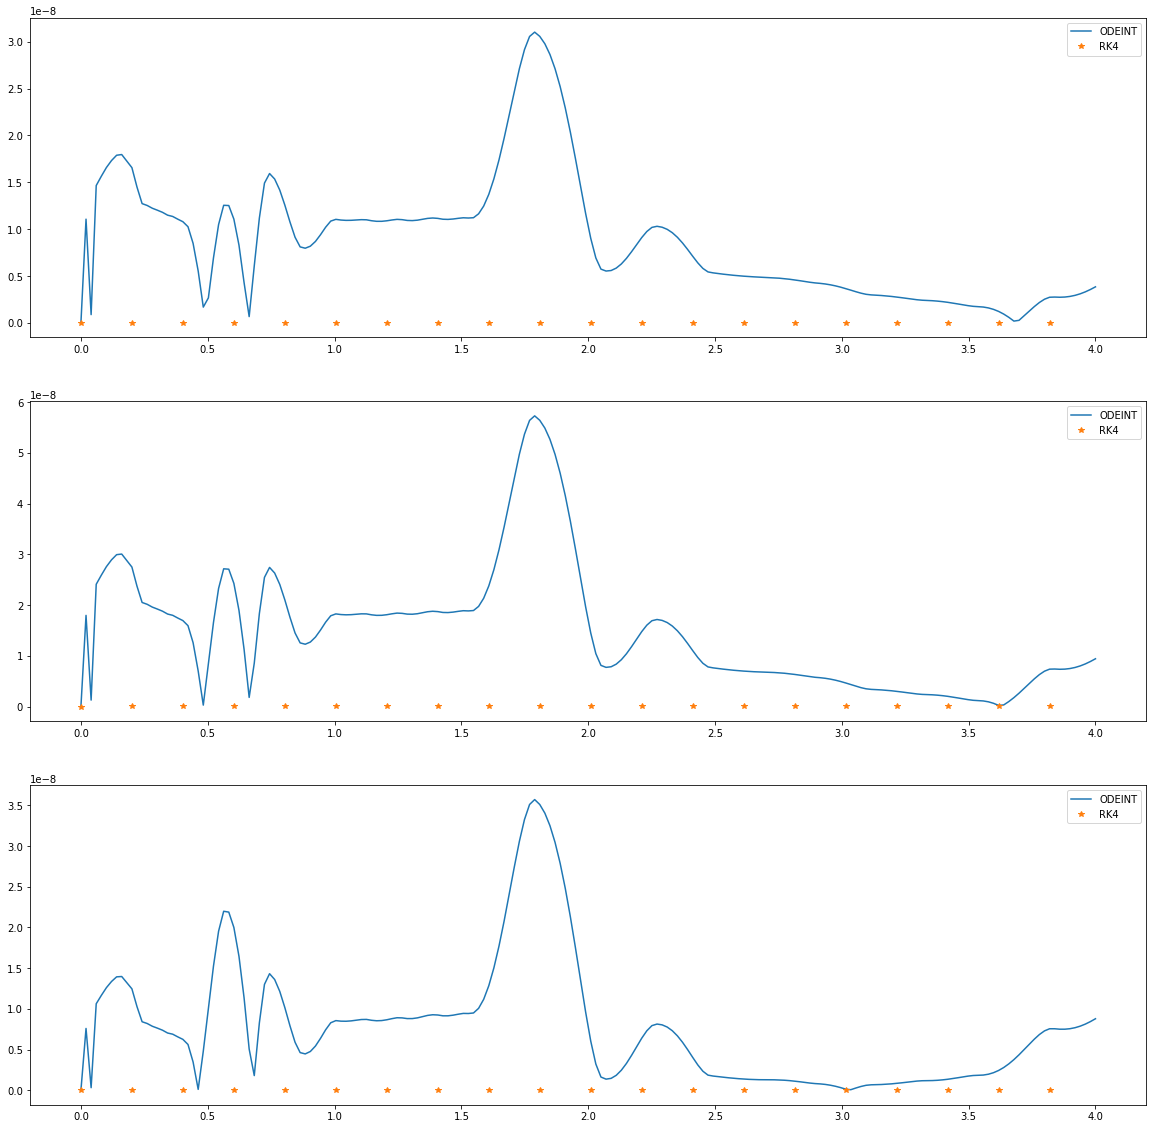

In [11]:
error_1_Euler=abs(X1-x1_euler)
error_2_Euler=abs(X2-x2_euler)
error_3_Euler=abs(X3-x3_euler)

error_1_RK4=abs(X1-x1_RK4)
error_2_RK4=abs(X2-x2_RK4)
error_3_RK4=abs(X3-x3_RK4)

error_1_ODE  = abs(X1-x1)
error_2_ODE  = abs(X2-x2)
error_3_ODE  = abs(X3-x3)

plt.figure(figsize = (20,20))
plt.subplot(3,1,1)
plt.plot(t,error_1_ODE)
# plt.plot(t,error_1_Euler)
plt.plot(t[::10],error_1_RK4[::10],'*')
plt.legend(['ODEINT','RK4'])


plt.subplot(3,1,2)
plt.plot(t,error_2_ODE)
# plt.plot(t,error_2_Euler)
plt.plot(t[::10],error_2_RK4[::10],'*')
plt.legend(['ODEINT','RK4'])

plt.subplot(3,1,3)
plt.plot(t,error_3_ODE)
# plt.plot(t,error_3_Euler)
plt.plot(t[::10],error_3_RK4[::10],'*')
plt.legend(['ODEINT','RK4'])
plt.show()

<font color =red >The plots above show that RK4 is the more accurate function.</font>

$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [12]:
def MatGenerator(a,b,K,α,β,N,g):
    H=(b-a)/N
    x=np.linspace(a,b,N+1)
    bb=np.zeros(N+1)
    bb=g(x)
    bb[0]=α
    bb[-1]=β
    
    A=np.zeros((N+1,N+1))
    A[0,0]=(H**2)/K
    A[N,N]=(H**2)/K
    
    for j in range(1,N):
        A[j,j-1]=-1
        A[j,j]=2
        A[j,j+1]=-1
        
    return (A*(K/(H**2))),bb

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, K=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x $$

In [13]:
a=0
b=1
K=1
α=-4
β=0
N=100
g=lambda x:-4*(1+x)*np.exp(x)

A,bb=MatGenerator(a,b,K,α,β,N,g)

w=np.linalg.solve(A,bb)

3. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^x$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

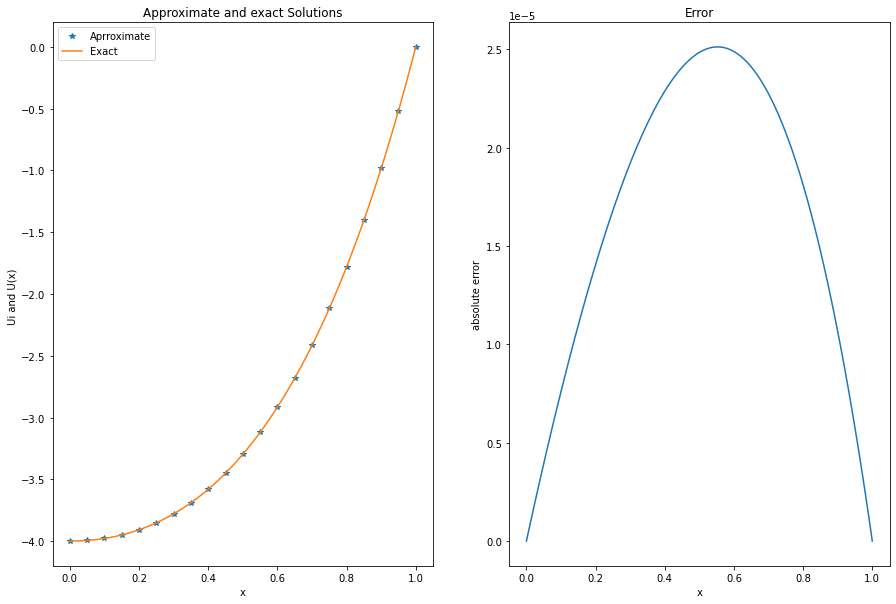

In [14]:
f= lambda x: 4*(x-1)*np.exp(x)
x=np.linspace(a,b,N+1)
p,bb=MatGenerator(a,b,K,α,β,N,g)
u=f(x)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(x[::5],w[::5],'*')
plt.plot(x,u)
plt.title('Approximate and exact Solutions')
plt.xlabel('x')
plt.ylabel('Ui and U(x) ')
plt.legend(['Aprroximate','Exact'])


plt.subplot(1,2,2)
plt.plot(x,abs(w-u))
plt.xlabel('x')
plt.ylabel('absolute error')
plt.title('Error')
plt.show()

# 4. If the parameter $K(x)$ varies with $x$, then the unsteady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\dfrac{d}{dx}\Bigl( K(x)\dfrac{dU}{dx} \Bigl) = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}


In this case, the backward Euler scheme applied to the unsteady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{1}{H^2}\Bigl(-K(x_{i-1/2})U_{i-1} +(K(x_{i-1/2})+K(x_{i+1/2}))U_i - K(x_{i+1/2})U_{i+1}\Bigr) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta,
  \end{cases}
\end{equation}
where $x_{i+1/2} = x_i+H/2$.
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
a. Write a Python function <b> MatGenerator1 </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def MatGenerator1(a,b,K,α,β,N,g):
    H=(b-a)/N
    x=np.linspace(a,b,N+1)
    b_=np.zeros(N+1)
    b_=g(x)
    b_[0]=α
    b_[-1]=β
    
    A_=np.zeros((N+1,N+1))
    A_[0,0]=1
    A_[N,N]=1
    
    for j in range(1,N):
        A_[j,j-1]=(1/H**2)*(-K(x[j]-H/2))
        A_[j,j]=(1/H**2)*(K(x[j]-H/2)+K(x[j]+H/2))
        A_[j,j+1]=(1/H**2)*(-K(x[j]+H/2))
    return A_,b_

b. Solve the unsteady-state heat-conduction problem for 

$$a=-1, b= 1, K(x)=x^2,\alpha = -8, \beta = 0, N= 100 \text{ and } g(x) = -4(x^3+3x^2)e^{x+1} $$

In [16]:
K=lambda x:x**2
g=lambda x: -4*(x**3+3*x**2)*np.exp(x+1)
a=-1
b=1
α=-8
β=0
N=100
x=np.linspace(a,b,N+1)
A_,b_=MatGenerator1(a,b,K,α,β,N,g)
#A_,b_

In [27]:
b_

array([-8.00000000e+00, -7.91679505e+00, -7.82716347e+00, -7.73108749e+00,
       -7.62855953e+00, -7.51958293e+00, -7.40417260e+00, -7.28235581e+00,
       -7.15417290e+00, -7.01967809e+00, -6.87894033e+00, -6.73204418e+00,
       -6.57909064e+00, -6.42019820e+00, -6.25550371e+00, -6.08516350e+00,
       -5.90935439e+00, -5.72827480e+00, -5.54214591e+00, -5.35121291e+00,
       -5.15574616e+00, -4.95604256e+00, -4.75242688e+00, -4.54525318e+00,
       -4.33490626e+00, -4.12180318e+00, -3.90639484e+00, -3.68916765e+00,
       -3.47064521e+00, -3.25139009e+00, -3.03200568e+00, -2.81313811e+00,
       -2.59547822e+00, -2.37976361e+00, -2.16678086e+00, -1.95736763e+00,
       -1.75241509e+00, -1.55287024e+00, -1.35973840e+00, -1.17408583e+00,
       -9.97042336e-01, -8.29804117e-01, -6.73636579e-01, -5.29877343e-01,
       -3.99939330e-01, -2.85313961e-01, -1.87574475e-01, -1.08379373e-01,
       -4.94759780e-02, -1.27041274e-02, -0.00000000e+00, -1.34000771e-02,
       -5.50452462e-02, -

c. The exact solution of the unsteady-state heat-conduction problem above is $U(x)=4(x-1)e^{x+1}$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

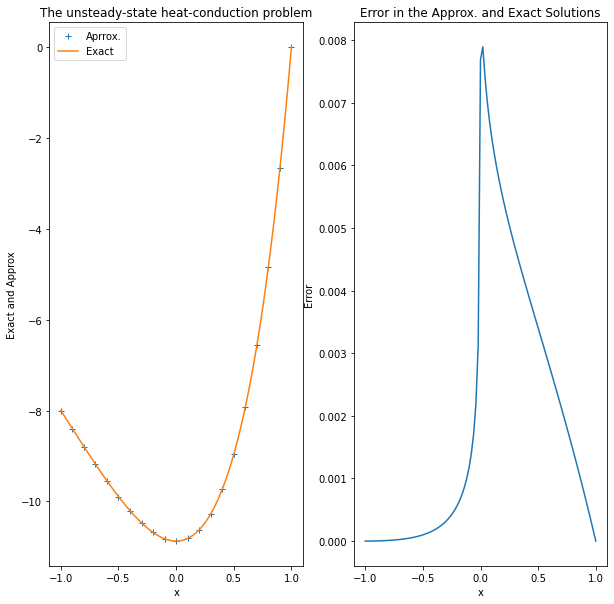

In [17]:

w_=np.linalg.solve(A_,b_)
#w_
f2=lambda x:4*(x-1)*np.exp(x+1)
u_=f2(x)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(x[::5],w_[::5],'+')
plt.plot(x,u_)
plt.xlabel('x')
plt.ylabel('Exact and Approx')
plt.legend(['Aprrox.','Exact'])
plt.title('The unsteady-state heat-conduction problem')

plt.subplot(1,2,2)
plt.plot(x,abs(u_-w_))
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error in the Approx. and Exact Solutions')
plt.show()

In [18]:
M=np.zeros((10,10))             #Matric Manipulation
for i in range(0,10):
    for j in range(0,10):
        if i==j:
            M[i,j]=2
        elif j==i+1:
            M[i,j]=-1
        elif i==j+1:
            M[i,j]=-8
print (M)

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-8.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -8.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -8.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -8.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -8.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -8.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -8.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -8.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -8.  2.]]
